In [3]:
# !mkdir -p /data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

# !wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

# !tar -xf v1.0-mini.tgz -C /data/sets/nuscenes  # Uncompress the nuScenes mini split.

#!pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

%matplotlib inline
from nuscenes.nuscenes import NuScenes
from numpy import ones,vstack,arctan
from numpy.linalg import lstsq
from math import sqrt,dist

nusc = NuScenes(dataroot=r'C:\Users\Stevens User\bdd100k\bdd100k\data\sets\nuscenes\v1.0-mini')
my_scene = nusc.scene[3]
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.565 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [1]:
#map import 
import matplotlib.pyplot as plt
import tqdm
import numpy as np

from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion import arcline_path_utils
from nuscenes.map_expansion.bitmap import BitMap


nusc_map = NuScenesMap(dataroot=r'C:\Users\Stevens User\bdd100k\bdd100k\data\sets\nuscenes\v1.0-mini', map_name='boston-seaport')



In [7]:
def defineSpace(x1, y1, x2, y2, size1, size2):
    size = dist([x1,y1],[x2,y2]) - (size1+size2)/2
    x = (x1+x2)/2
    y = (y1+y2)/2
    return [round(size,3),round(x,3),round(y,3)]

def findSpace(sample, xL, yL, xR, yR, orientation):
    points = [(xL,yL),(xR,yR)]
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords, rcond=None)[0]
    print("Line Solution is y = {m}x + {c}".format(m=m,c=c))
    theta = arctan(m)
    

    
    cars = []
    for ann in sample['anns']:
        meta = nusc.get('sample_annotation', ann)
        if abs(meta['translation'][1] - m*meta['translation'][0] - c) < 5 and meta['translation'][0] > xL and meta['translation'][0] < xR:
                cars.append([meta['translation'][0], meta['translation'][1], meta['size'][orientation]])
                
    # print(cars)
    cars.sort()
    spaces = []
    spaces.append(defineSpace(xL,yL,cars[0][0],cars[0][1],0,cars[0][2]))
    i = 0
    l = len(cars)
    while i < l-1:
        spaces.append(defineSpace(cars[i][0],cars[i][1],cars[i+1][0],cars[i+1][1],cars[i][2],cars[i+1][2]))
        i = i + 1
    spaces.append(defineSpace(cars[i][0],cars[i][1],xR,yR,cars[0][2],0))
    
    return spaces
    
spaces = findSpace(my_sample, 1744,857,1802,858,0)
for space in spaces:
    if space[0] > 2.5:
        print(str(space[0]) + " width space detected at [" + str(space[1]) + ", " + str(space[2]) + "]")
        
nusc.render_sample_data(my_sample['data']['LIDAR_TOP'])

NameError: name 'my_sample' is not defined

In [3]:
import gc
gc.collect()

0

C:\Users\Stevens User\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


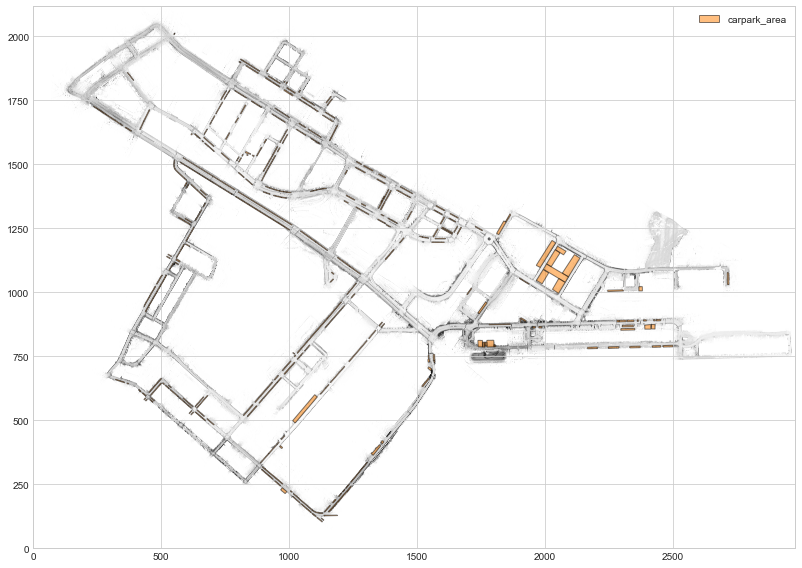

In [2]:
#map output
bitmap = BitMap(nusc_map.dataroot, nusc_map.map_name, 'basemap')
myplot = nusc_map.render_layers(['carpark_area'], figsize=1, bitmap=bitmap)


In [4]:

type(nusc)

nuscenes.nuscenes.NuScenes